# Predicting used car prices using a Random Forest algorithm, hyper-parameter tuning & feature importance.

## Introduction and Objetives

##### Approximately 40 million used vehicles are sold each year. Effective pricing strategies can help any company to efficiently sell its products in a competitive market and making profit.

##### There are two main goals I want to achieve with this Data Science Project. First, to estimate the price of used cars by taking into account a set of features, based on historical data. Second, to get a better understanding on the most relevant features that help determine the price of a used vehicle.

## Importing Libraries

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

## Importing Data

In [2]:
database = pd.read_csv('C:/Users/Window-Genoveffa/Dropbox/1_ALESSANDRO/Python_SQL/PythonIntro/vehicles.csv')

In [3]:
np.random.seed(0) 

## EDA

### Understanding the Data

In [4]:
database.shape

(458213, 26)

In [5]:
database.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [7]:
#I can see there is a big difference between the max and the 75% of each price/odometer. 
#Likewise, there is a big difference between the min and the 25% in year/price/odometer
#Thus, I will handle the outliers later on the kernel.
database.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [8]:
database.head(5)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


### Missing Values

In [9]:
#After understanding the database structure better, I check null values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,321348,70.1
condition,192940,42.1
VIN,187549,40.9
cylinders,171140,37.3
paint_color,140843,30.7
drive,134188,29.3
type,112738,24.6
odometer,55303,12.1
manufacturer,18220,4.0
long,7448,1.6


In [10]:
#I will be droping some columns that I won't be using
database.drop(['lat', 'long', 'region_url','VIN','posting_date', 'url', 'id', 'image_url'], axis = 1, inplace = True)

In [11]:
database.shape

(458213, 18)

In [12]:
#Finally, I will check in case there are some duplicated rows.
database.duplicated().sum()

0

In [13]:
#I drop the duplicates and keep one of each 
database = database.drop_duplicates(keep='first')

## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FCD198D08>,
      dtype=object)

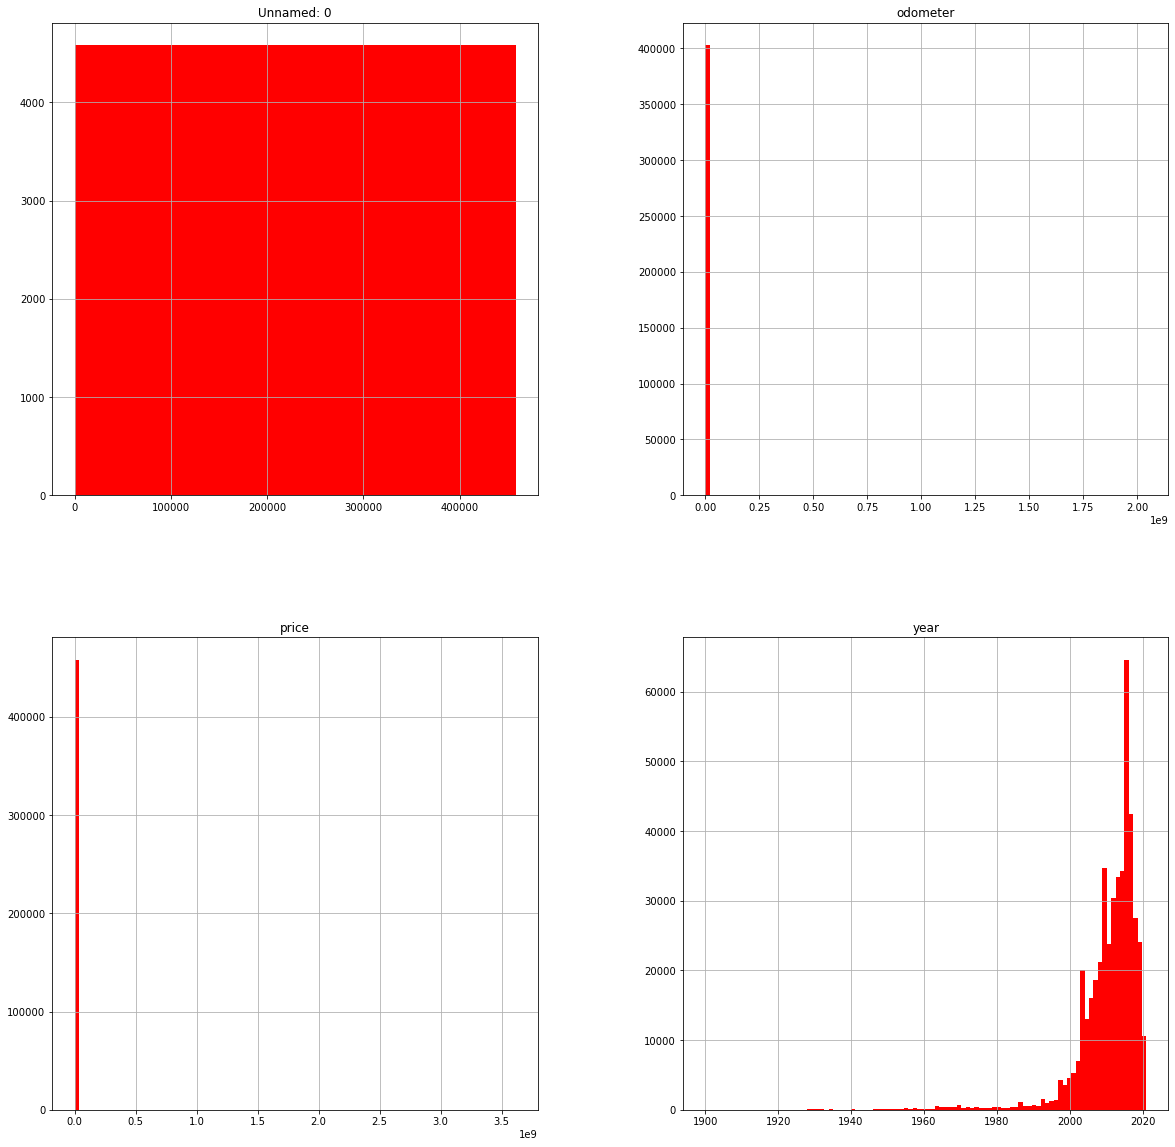

In [14]:
#I check the distribution of some features in our database
database.hist(bins= 100, figsize = (20,20), color = 'r')

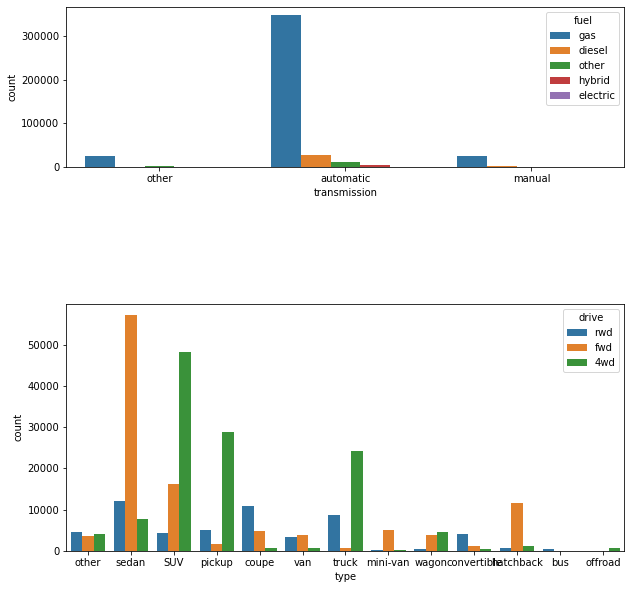

In [15]:
plt.figure(figsize=[10,10])
plt.subplot(311)
sns.countplot(x = 'transmission', hue = 'fuel', data = database)
plt.subplot(212)
sns.countplot(x = 'type', hue = 'drive', data = database)

## Feature Engineering

### Regular Expressions to fill missing values 

In [16]:
#I create a variable with only the features I want
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]

In [17]:
#Finally I create a chart to understand better each feature's unique values
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart.append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)
#I use these options to show all values in the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
chart

C:\Users\Window-Genoveffa\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


,columns,values
0,manufacturer,"[chevrolet, hyundai, bmw, ford, toyota, jeep, ram, nan, honda, dodge, lexus, mercedes-benz, cadillac, gmc, subaru, infiniti, mazda, mini, nissan, volkswagen, kia, lincoln, mitsubishi, buick, audi, rover, chrysler, fiat, acura, volvo, pontiac, tesla, saturn, mercury, datsun, porsche, jaguar, ferrari, alfa-romeo, harley-davidson, land rover, aston-martin, morgan, hennessey]"
1,condition,"[good, excellent, nan, like new, fair, salvage, new]"
2,cylinders,"[8 cylinders, 4 cylinders, 6 cylinders, nan, 10 cylinders, other, 5 cylinders, 3 cylinders, 12 cylinders]"
3,fuel,"[gas, diesel, other, hybrid, nan, electric]"
4,title_status,"[clean, lien, missing, salvage, rebuilt, nan, parts only]"
5,transmission,"[other, automatic, manual, nan]"
6,drive,"[rwd, fwd, nan, 4wd]"
7,size,"[nan, full-size, mid-size, compact, sub-compact]"
8,type,"[other, sedan, SUV, pickup, coupe, van, nan, truck, mini-van, wagon, convertible, hatchback, bus, offroad]"
9,paint_color,"[nan, blue, red, silver, black, white, grey, orange, green, yellow, custom, brown, purple]"


In [18]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [19]:
#For starters, I will be using the column Description to fill the some missing data on other columns.
#After using Description, I have no more need for this column so I drop it.
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    database[i] = database[i].fillna(
      database['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

database.drop('description', axis=1, inplace= True)

In [20]:
#And, I check again each unique values for the columns I modified.
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart.append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
chart

C:\Users\Window-Genoveffa\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,columns,values
0,manufacturer,"[chevrolet, hyundai, bmw, ford, toyota, jeep, ram, ram , nan, honda, dodge, lexus, mercedes-benz, cadillac, gmc, subaru, infiniti, mazda, mini, nissan, volkswagen, kia, lincoln, mitsubishi, dodge , morgan , buick, audi, rover, chrysler, fiat, acura, volvo, chevrolet , hyundai , pontiac, nissan , tesla, buick , jeep , saturn, mercury, mini , toyota , ford , volvo , datsun, mercedes-benz , porsche, chrysler , jaguar, acura , lexus , volkswagen , gmc , subaru , audi , mazda , cadillac , bmw , lincoln , ferrari, alfa-romeo, infiniti , kia , honda , ferrari , harley-davidson, land rover, jaguar , mercury , fiat , pontiac , mitsubishi , aston-martin, datsun , porche , tesla , saturn , morgan, hennessey, land rover , harley-davidson ]"
1,condition,"[good, excellent, new, like new, good , nan, fair, fair , salvage, like new , excellent , new, salvage ]"
2,cylinders,"[8 cylinders, 4 cylinders, 6 cylinders, nan, 4 cylinder , 10 cylinders, 6 cylinder , other, 5 cylinders, 5 cylinder , 3 cylinders, 8 cylinder , 12 cylinders, 12 cylinders, 4 cylinders , 6 cylinders , 8 cylinders , 10 cylinders, 10 cylinder, 3 cylinder , 8 cylinder , 12 cylinder, 3 cylinders , 5 cylinders , 4 cylinders , \t4 cylinder , \t8 cylinder , 6 cylinder , 4 cylinder , 2 cylinder ]"
3,fuel,"[gas, diesel, other, hybrid, nan, electric, diesel , hybrid , gas ]"
4,title_status,"[clean, lien, missing, salvage, rebuilt, nan, rebuilt , parts only, clean , missing ]"
5,transmission,"[other, automatic, manual, nan, automatic , manual]"
6,drive,"[rwd, fwd, nan, 4wd, awd , 4x4 , 4wd, fwd , rwd ]"
7,size,"[nan, full-size, mid-size, compact, full-size , compact , sub-compact, mid-size , sub-compact]"
8,type,"[other, sedan, suv, pickup, coupe, van, nan, sedan , truck, mini-van, wagon, van , convertible, hatchback, coupe , truck , suv , pickup , convertible , bus , bus, offroad, hatchback , wagon , offroad, mini-van ]"
9,paint_color,"[red , nan, blue, red, silver, black, white, grey, orange, blue , green, white , yellow, silver , black , custom , brown , orange , custom, brown, purple, grey , green , purple , yellow]"


In [21]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [22]:
##I need to take care of some things now: 
#Inconsistent data entry. 
columns = ['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']
for i in columns: 
    database[i] = database[i].str.strip()

In [23]:
database['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '4 cylinder',
       '10 cylinders', '6 cylinder', 'other', '5 cylinders', '5 cylinder',
       '3 cylinders', '8 cylinder', '12 cylinders', '10 cylinder',
       '3 cylinder', '12 cylinder', '2 cylinder'], dtype=object)

In [24]:
values = {"4 cylinder" : "4 cylinders",
         "6 cylinder" : "6 cylinders",
         "8 cylinder" : "8 cylinders",
         "3 cylinder" : "3 cylinders",
         "5 cylinder" : "5 cylinders",
         "10 cylinder": "10 cylinders",
         "7 cylinder" : "7 cylinders",
         "2 cylinder": '2 cylinders',
         "12 cylinder": "12 cylinders"}
for i,j in values.items():
    database.replace(to_replace=i, value=j, inplace=True)
database['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders',
       '2 cylinders'], dtype=object)

In [25]:
#I check again NaN values 
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,301948,65.9
cylinders,159951,34.9
drive,99746,21.8
condition,89661,19.6
type,71667,15.6
paint_color,64998,14.2
odometer,55303,12.1
manufacturer,12089,2.6
model,4846,1.1
fuel,2216,0.5


### Handling Outliers

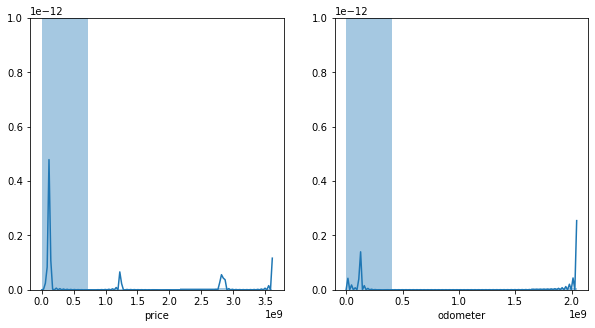

In [26]:
#I are going to handle those outliers of odometer and price I saw before in the description
#First I will visualize them
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(database['price'], bins = 5)
plt.subplot(122)
sns.distplot(database['odometer'], bins = 5)

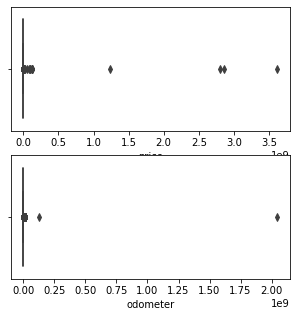

In [27]:
#Another type of visualization to check on the outliers
plt.figure(figsize=[5,5])
plt.subplot(211)
sns.boxplot(x=database['price'])
plt.subplot(212)
sns.boxplot(x=database['odometer'])

In [28]:
#First I will drop the 10% of each side on price
rr=sorted(database["price"])
quantile1, quantile2= np.percentile(rr,[10,90])
print(quantile1,quantile2)

651.0 33500.0


In [29]:
database=database[(database.price <= 32254.20000000007) 
                  & (database.price >= 800.0)]
database.shape

(361167, 17)

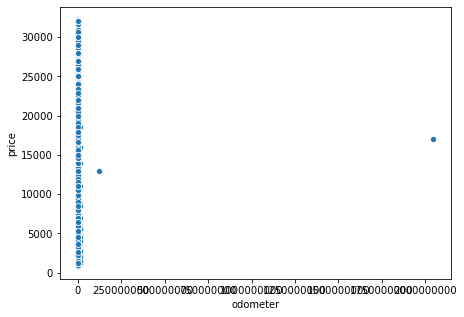

In [30]:
#Now I handle odometer.
#Since there are null values I cannot do what I did with price.
#I use scatterplot to visually check the outliers.
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['odometer'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [31]:
#I will take values up until 3,000,000.
database=database[(database.odometer < 3000000)]

In [32]:
#Also I will be deleting the values equal to 0
database.drop(database[database["odometer"]==0.0].index,inplace=True)

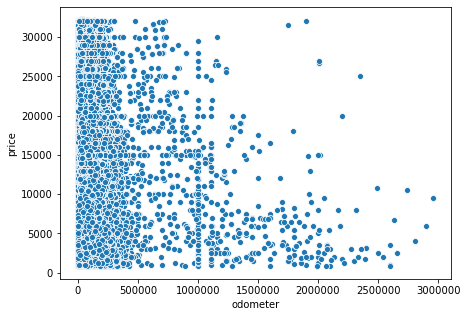

In [33]:
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['odometer'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

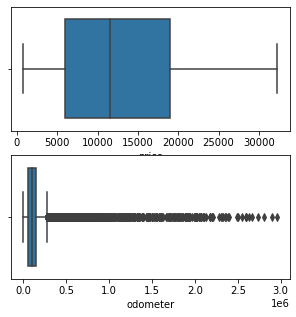

In [34]:
#After handling the outliers
plt.figure(figsize=[5,5])
plt.subplot(211)
sns.boxplot(x=database['price'])
plt.subplot(212)
sns.boxplot(x=database['odometer'])

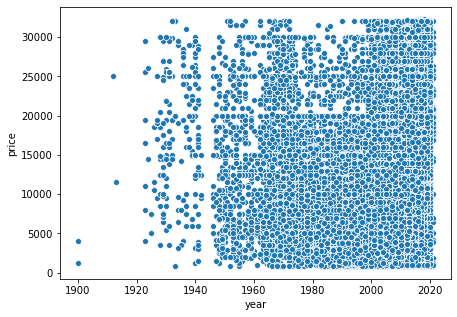

In [35]:
#Finally I deal with the outliers in year. Let's visualize them.
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['year'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

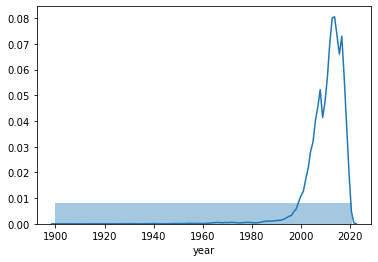

In [36]:
#Another visualization
sns.distplot(database['year'], bins = 1)

In [37]:
#I will be eliminating rows with the year 2021 and those with year <1946
database[database['year'] == 1945].count()

Unnamed: 0      0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [38]:
database=database[(database.year > 1945 )]
database.drop(database[database["year"]==2021].index,inplace=True)

In [39]:
#Let's check NaN values again
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,199738,63.1
cylinders,95675,30.2
drive,59217,18.7
condition,55642,17.6
type,39774,12.6
paint_color,35940,11.3
manufacturer,6138,1.9
model,2263,0.7
fuel,1447,0.5
transmission,1088,0.3


### Condition - Status - Odometer

In [40]:
#I will first drop the unusable rows of status and condition
drop = database.loc[database.title_status.isnull() & database.condition.isnull()] #unusable rows
database = database.loc[database.title_status.isnull() & database.condition.notnull() 
                        | database.title_status.notnull() & database.condition.isnull() 
                         | database.title_status.notnull() & database.condition.notnull()] #the dataframe with the usable rows
database.shape

(316105, 17)

In [41]:
# I believe these 3 columns have a relationship so I will use odometer to infer their values
#First I want to create bins to contain the values of the odometer
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(pd.cut(database.odometer, bins))
groups.title_status.count()

odometer
(0, 30000]            40109
(30000, 60000]        47908
(60000, 90000]        51253
(90000, 115000]       49528
(115000, 150000]      58991
(150000, 10000000]    67905
Name: title_status, dtype: int64

In [42]:
#"title_status" doesn't bring us that much of a value since most values are "clean".
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(['title_status', pd.cut(database.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
title_status,,,,,,
clean,38176,45456,48760,47773,57265,66074
lien,176,296,329,228,216,205
missing,54,19,34,40,38,93
parts only,8,3,5,6,12,19
rebuilt,1203,1619,1531,1029,932,796
salvage,492,515,594,452,528,718


In [43]:
#Thus I  will add "clean" to the NaN values
database.title_status.fillna("clean", inplace=True)

In [44]:
#Now I compare odometer and condition
#Makes no sense to compare condition and title_status since most of the values are "clean"
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(['condition', pd.cut(database.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
condition,,,,,,
excellent,6607,12131,17018,18263,21086,18730
fair,528,670,707,776,1230,3932
good,19611,17766,15739,13451,17289,25353
like new,3599,3443,3492,2829,2957,2180
new,4489,5725,5334,4850,5257,5191
salvage,84,110,147,133,150,251


In [45]:
#Now I add values to those NaN in "condition" using odometer range of values

m1 = (database['odometer'] > 60000) & (database['odometer'] <= 150000)
m2 = (database['odometer'] <= 60000) | (database['odometer'] > 150000)

database.loc[m1,'condition'] = database.loc[m1,'condition'].fillna('excellent')
database.loc[m2,'condition'] = database.loc[m2,'condition'].fillna("good")

In [46]:
#I combine condition and title_status and then I drop them
database['status'] = database['condition'] + ' & ' + database['title_status']
database.drop(['condition', 'title_status'], axis = 1, inplace=True)
database.head(5)

,Unnamed: 0,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,status
1,1,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,automatic,fwd,NaN,sedan,NaN,al,excellent & clean
2,2,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,automatic,NaN,NaN,suv,blue,al,good & clean
3,3,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue,al,good & clean
4,4,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue,al,excellent & lien
5,5,auburn,29590,2016.0,toyota,tacoma double cab sr5,6 cylinders,gas,33290.0,other,NaN,NaN,pickup,red,al,good & clean


### Other methods to deal with NaN values

In [47]:
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,199109,63.0
cylinders,95047,30.1
drive,59184,18.7
type,39726,12.6
paint_color,35610,11.3
manufacturer,6134,1.9
model,2263,0.7
fuel,1151,0.4
transmission,1038,0.3
Unnamed: 0,0,0.0


In [48]:
#First I delete "size" since it has so many NaN values
database.drop('size', axis=1, inplace=True)

In [ ]:
#I will be deleting the NaN values < 5%  and "size" since 
database=database.dropna(subset=['transmission', 'fuel', 'model', 'manufacturer','paint_color'])

In [50]:
#Now I will be using "ffill" for those NaN values between 10% and 30%
columns = ['drive', 'type', 'paint_color']
for i in columns:
    database[i] = database[i].fillna(method='ffill')

C:\Users\Window-Genoveffa\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
#I check again since there must be left some NaN values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
paint_color,1,0.0
Unnamed: 0,0,0.0
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0


In [52]:
#I delete that subset of NaN values
database=database.dropna(subset=['type'])

In [53]:
#Finally instead of doing the ffill I will use drive to guess cylinders' NaN values
database.groupby(['drive', 'cylinders']).cylinders.count()

drive  cylinders   
4wd    10 cylinders      424
       12 cylinders       11
       3 cylinders        38
       4 cylinders     20263
       5 cylinders       428
       6 cylinders     34790
       8 cylinders     26361
       other             112
4x4    10 cylinders        1
       3 cylinders         1
       4 cylinders       333
       5 cylinders         7
       6 cylinders       308
       8 cylinders       240
awd    3 cylinders         2
       4 cylinders      1734
       5 cylinders        12
       6 cylinders      1533
       8 cylinders       346
       other               5
fwd    10 cylinders       54
       12 cylinders        5
       3 cylinders       286
       4 cylinders     54105
       5 cylinders      1083
       6 cylinders     28135
       8 cylinders      3273
       other             270
rwd    10 cylinders      435
       12 cylinders       42
       2 cylinders         1
       3 cylinders        47
       4 cylinders      5655
       5 cylinders     

In [54]:
#I add a value to the Nan values of cylinders using drive 
values = {'4wd': '6 cylinders',
              '4x4': '6 cylinders',
              'awd': '6 cylinders',
              'fwd': '4 cylinders',
              'rwd': '8 cylinders'}

database.loc[database["cylinders"].isna(), 'cylinders'] = database.loc[
    database["cylinders"].isna(), 'drive'].map(lambda x: values[x])

### Region - State

In [55]:
#Since they are deeply connected I will join these 2 columns
#I combine condition and title_status and then I drop them
database['region'] = database['region'] + ' (' + database['state'] + ')'
database.drop(['state'], axis = 1, inplace=True)
database.head(5)

,Unnamed: 0,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,status
1,1,auburn (al),7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,automatic,fwd,sedan,NaN,excellent & clean
2,2,auburn (al),4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,automatic,fwd,suv,blue,good & clean
3,3,auburn (al),2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,good & clean
4,4,auburn (al),19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,automatic,4wd,pickup,blue,excellent & lien
5,5,auburn (al),29590,2016.0,toyota,tacoma double cab sr5,6 cylinders,gas,33290.0,other,4wd,pickup,red,good & clean


## Categorical Variable Encoding

In [56]:
database.shape

(305647, 14)

In [61]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305647 entries, 1 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    305647 non-null  int64  
 1   region        305647 non-null  object 
 2   price         305647 non-null  int64  
 3   year          305647 non-null  float64
 4   manufacturer  305647 non-null  object 
 5   model         305647 non-null  object 
 6   cylinders     305647 non-null  object 
 7   fuel          305647 non-null  object 
 8   odometer      305647 non-null  float64
 9   transmission  305647 non-null  object 
 10  drive         305647 non-null  string 
 11  type          305647 non-null  string 
 12  paint_color   305646 non-null  string 
 13  status        305647 non-null  string 
dtypes: float64(2), int64(2), object(6), string(4)
memory usage: 35.0+ MB


In [82]:
database.head(20)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer,price
1,18,17,16795,4,2,0,3,8,1,0,2014.0,93600.0,7500
2,18,4,19279,6,2,0,3,9,1,12,2006.0,87046.0,4900
3,18,7,4381,4,2,0,4,7,1,12,1974.0,190000.0,2000
4,18,13,9357,7,0,0,0,7,1,1,2005.0,116000.0,19500
5,18,40,17534,6,2,2,0,7,8,12,2016.0,33290.0,29590
8,18,20,19162,6,2,2,0,6,8,12,2017.0,29614.0,31990
10,18,13,8664,6,0,0,0,7,9,0,2012.0,189000.0,27500
12,18,35,164,6,4,2,0,7,8,12,2016.0,57926.0,24990
13,18,17,18472,6,2,0,2,7,8,23,2010.0,126000.0,5995
14,18,13,8059,7,2,0,4,9,1,12,2003.0,177000.0,4900


In [63]:
#I have 14 columns. Out of those, 10 columns are categorical. 
# Apply the Label encoder to each categorical feature 
database[['drive', 'type', 'paint_color', 'status']] = database[['drive', 'type', 'paint_color', 'status']].astype('string')
database.fillna('blue',inplace = True)
from sklearn.preprocessing import LabelEncoder 
cat_features = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 
                'drive', 'type', 'paint_color', 'status'] 
encoder = LabelEncoder() 
encoded = database[cat_features].apply(encoder.fit_transform)
database.drop(cat_features, axis=1, inplace=True)
database = pd.concat([encoded,database],axis = 1) 
database.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,Unnamed: 0,price,year,odometer
1,18,17,16795,4,2,0,3,8,1,0,1,7500,2014.0,93600.0


## Correlations

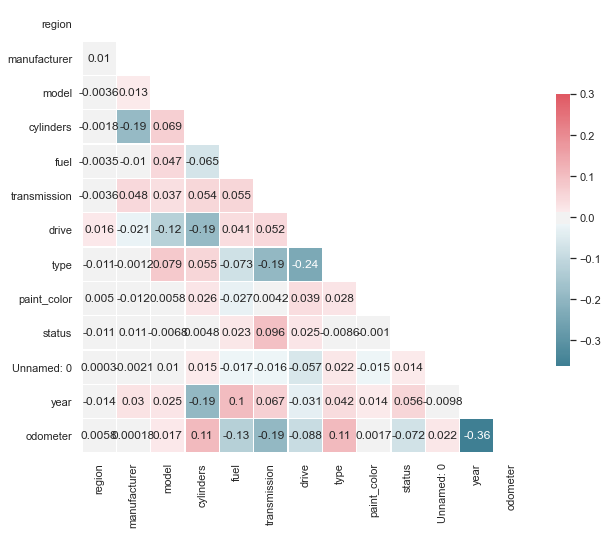

In [65]:
#I check high correlated features with the Correlation Matrix
#If there are none, I leave the database as it is
sns.set(style="white")
corr = database.drop(columns = ['price']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot = True)

## Splitting into Train and Test Set 

In [66]:
database.columns

Index(['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission',
       'drive', 'type', 'paint_color', 'status', 'Unnamed: 0', 'price', 'year',
       'odometer'],
      dtype='object')

In [67]:
#First, I change the order of the features and I put the depedent variable at the end
column_names = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission',
       'drive', 'type', 'paint_color', 'status', 'year',
       'odometer' , 'price']

database = database.reindex(columns = column_names ) 
database.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer,price
1,18,17,16795,4,2,0,3,8,1,0,2014.0,93600.0,7500


In [68]:
#I split into Training and Test Set

X = database.iloc[:,:-1]  #independent columns
y = database.iloc[:,-1]    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [69]:
#Now I do some Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #I do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #I give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #I give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

X_train.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer
80981,0.327191,-1.36244,-1.400962,0.500836,0.017524,-0.364767,-1.254471,0.126028,0.566728,1.821347,-1.973131,1.59451


## Modelling

### Random Forest

In [70]:
#I chose Random Forest algorith for this project
#Let's do Cross Validation to check the overal score in the Training Set
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores = []
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100,2))

In [71]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores})
results

,Metrics,Accuracy
0,R2,88.6


### Hyper-parameter tuning

In [72]:
#To improve the performance of the model, I optimise hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300]}
forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 15.9min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 20.5min finished


{'n_estimators': 300}

In [74]:
scores2 = []
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid, X_train, y_train, scoring='r2', cv=5)
scores2.append(round(acc2.mean()*100,2))

In [75]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,88.6,89.26


### Validation

In [76]:
#Finally let's check the performance on the Test Set
from sklearn.metrics import r2_score

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
acc_test = round(r2_score(y_test,y_pred)*100,2)

In [77]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2,
    'Accuracy Test Set': acc_test})
results

,Metrics,Accuracy,Accuracy Tuned Param,Accuracy Test Set
0,R2,88.6,89.26,89.9


In [78]:
#Other metrics apart from R2 
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1519.98
Mean Squared Error: 6886699.66
Root Mean Squared Error: 2624.25


### Feature importance

In [79]:
#On to the second goal: feature importance when predicting prices
name = []
importance = []
for nam, imp in zip(X, best_grid.feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [80]:
features = pd.DataFrame({'Features': name, "Importance (%)": importance})
features.sort_values(by='Importance (%)', ascending = False)

,Features,Importance (%)
10,year,41.29
11,odometer,15.47
3,cylinders,13.03
2,model,9.14
1,manufacturer,4.91
4,fuel,4.17
7,type,3.31
6,drive,2.75
0,region,2.03
9,status,1.64


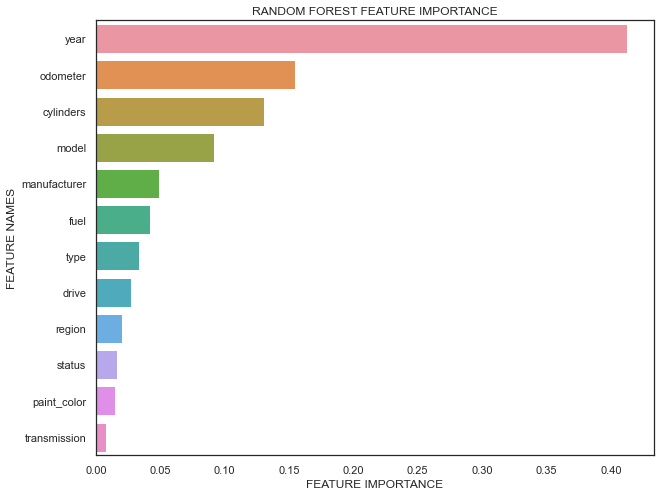

In [81]:
#Finally I plot it 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(best_grid.feature_importances_,X.columns,'RANDOM FOREST')